Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

# Descriptive analysis

In [11]:
!pip install imbalanced-learn==0.6.0

In [2]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

here 32560 rows and 15 column are present..

In [5]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
6611,19,Private,195985,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
19646,32,Private,170017,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
2291,18,?,346382,11th,7,Never-married,?,Own-child,White,Male,0,0,15,United-States,<=50K


In [7]:
#indexces at  axis =1
type(data.columns)

pandas.core.indexes.base.Index

In [8]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here we can see that no any null values are present, this is good for me..in this data set 6 type of integer value and 9 type object value are present.but no any float type variable are present...and our target column is object data type..
so we should convert object type data into ML form...

# EDA

In [13]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
# Check for null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [16]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [17]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
data['Income'].nunique()

2

this showes 2 array value,but data type is "object" type...we have to apply encoding technique..

# Checking missing values

In [19]:
# Check for '?' in dataset
round((data.isin(['?']).sum() / data.shape[0])
      * 100, 4).astype(str) + '%'

Age               0.0%
Workclass         0.0%
Fnlwgt            0.0%
Education         0.0%
Education_num     0.0%
Marital_status    0.0%
Occupation        0.0%
Relationship      0.0%
Race              0.0%
Sex               0.0%
Capital_gain      0.0%
Capital_loss      0.0%
Hours_per_week    0.0%
Native_country    0.0%
Income            0.0%
dtype: object

In [20]:
data.shape

(32560, 15)

In [21]:
# Checking the counts of label categories
income = data['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# Data Visualization

Correlation b/w label and features..firstly check all data through "Univariate Analysis"...

# 1: Univariate Analysis(using Bar plot)

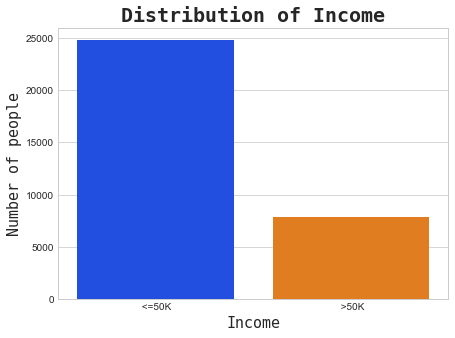

In [22]:
# Creating a barplot for 'Income'
income = data['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

here we can say that income less then 50k is greater then the "income" greater then the 50 k is less...

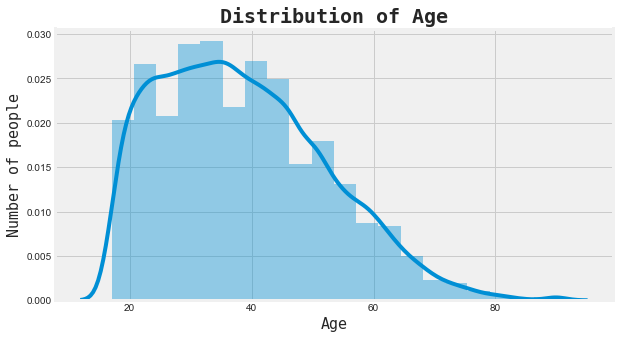

In [23]:
# Creating a distribution plot for 'Age'
age = data['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

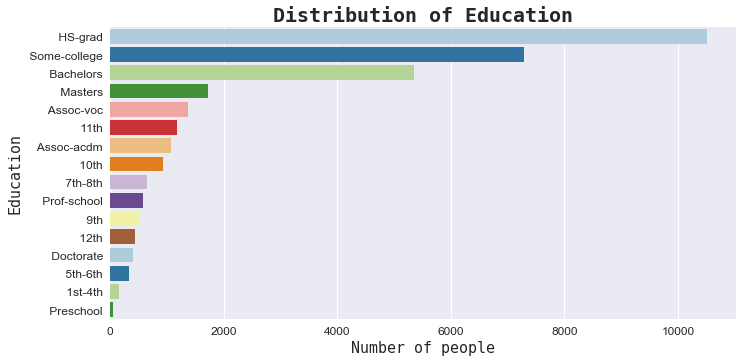

In [24]:
# Creating a barplot for 'Education'
edu = data['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot( edu.values,edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

here we can see that no of people is max.whose education is " H-S-Grad"..

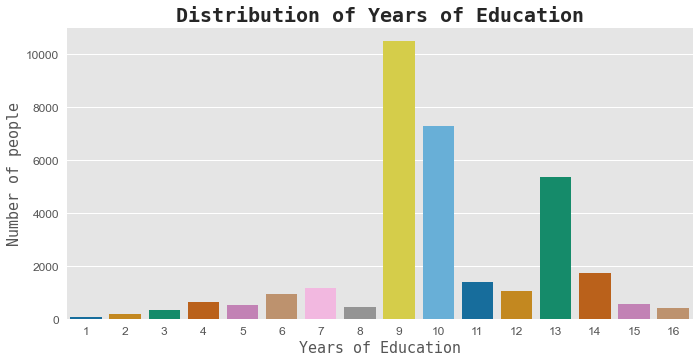

In [25]:
# Creating a barplot for 'Years of Education'
edu_num = data['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

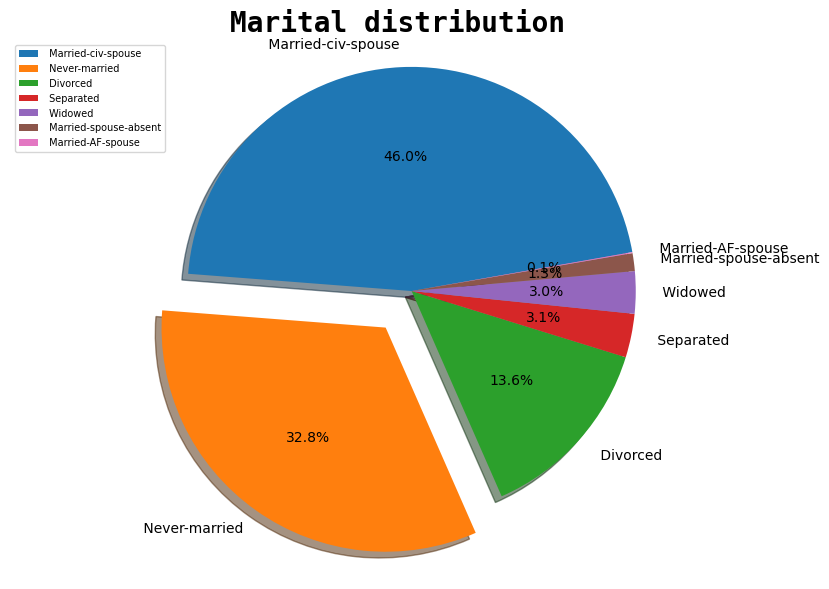

In [26]:
# Creating a pie chart for 'Marital status'
marital = data['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

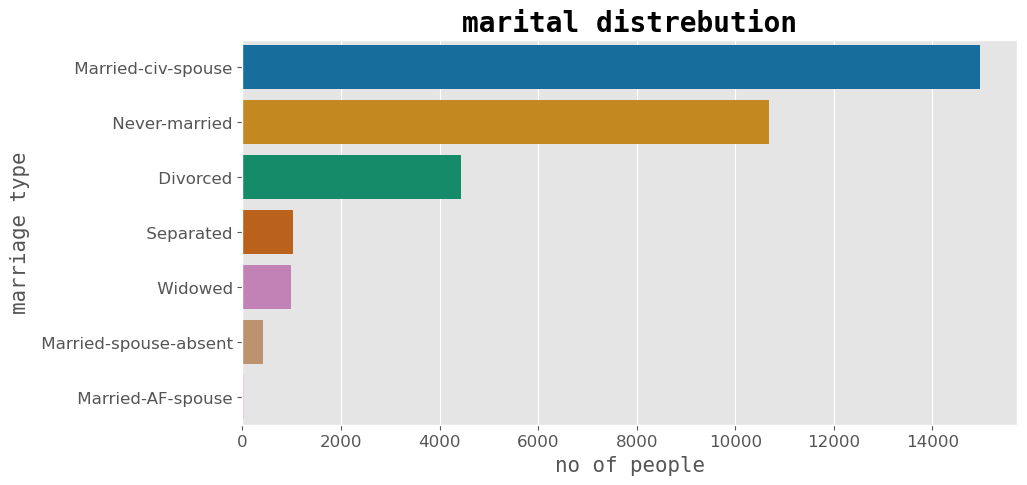

In [27]:
# Creating a barplot for 'Marital status'
mariatl = data['Marital_status'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(marital.values,marital.index,  palette='colorblind')
plt.title('marital distrebution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('no of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('marriage type', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

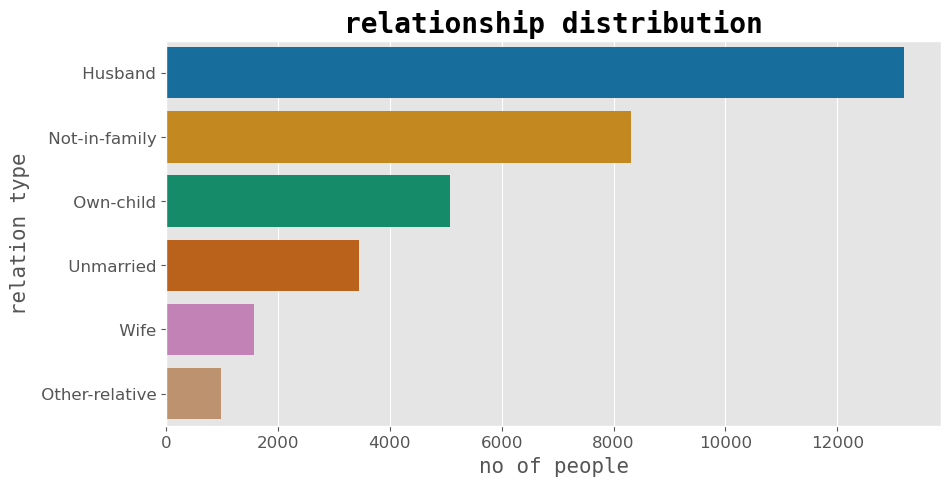

In [28]:
# Creating a barplot for 'Realationship'
relation = data['Relationship'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(relation.values,relation.index,  palette='colorblind')
plt.title('relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('no of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('relation type', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

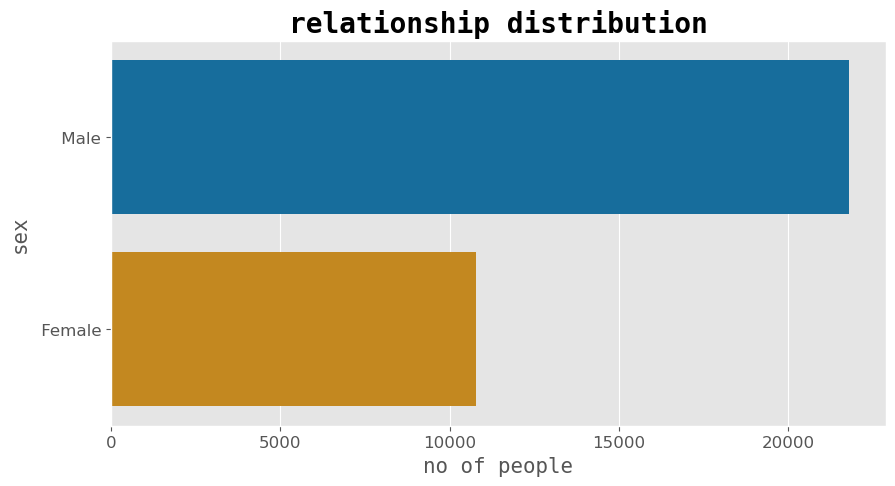

In [29]:
# Creating a barplot for 'Sex'
sex = data['Sex'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(sex.values,sex.index,  palette='colorblind')
plt.title('relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('no of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

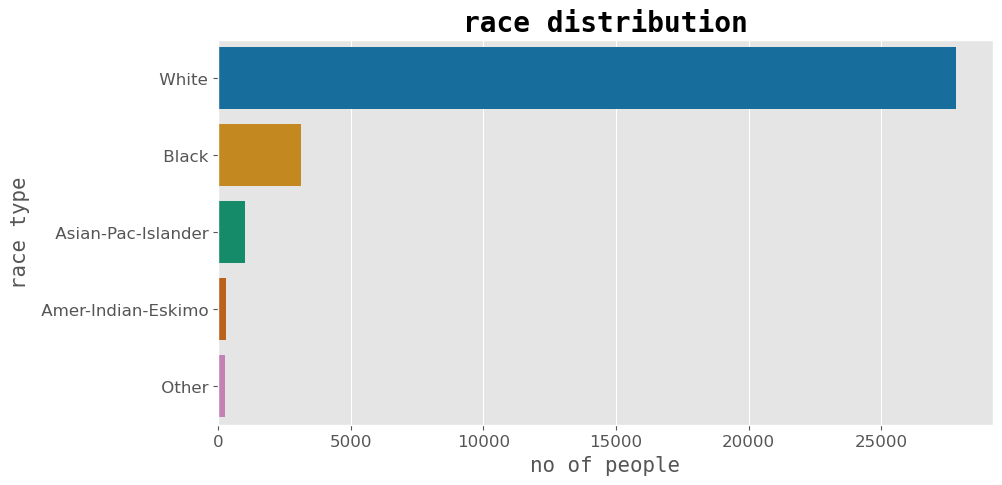

In [30]:
# Creating a barplot for 'Race'
race = data['Race'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(race.values,race.index,  palette='colorblind')
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('no of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('race type', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

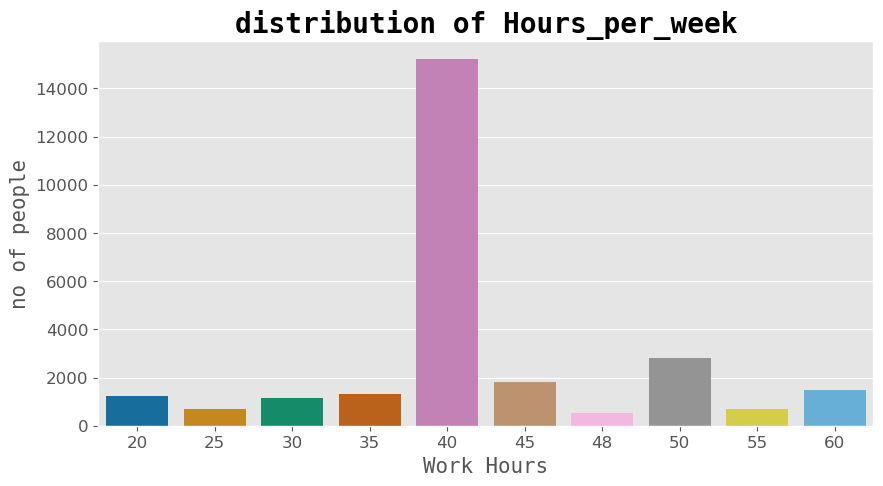

In [31]:
# Creating a barplot for 'Hours_per_week'
Hours = data['Hours_per_week'].value_counts().head(10)

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(Hours.index,Hours.values,  palette='colorblind')
plt.title('distribution of Hours_per_week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('no of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Work Hours', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# Bivariate Analysis(using count plot)

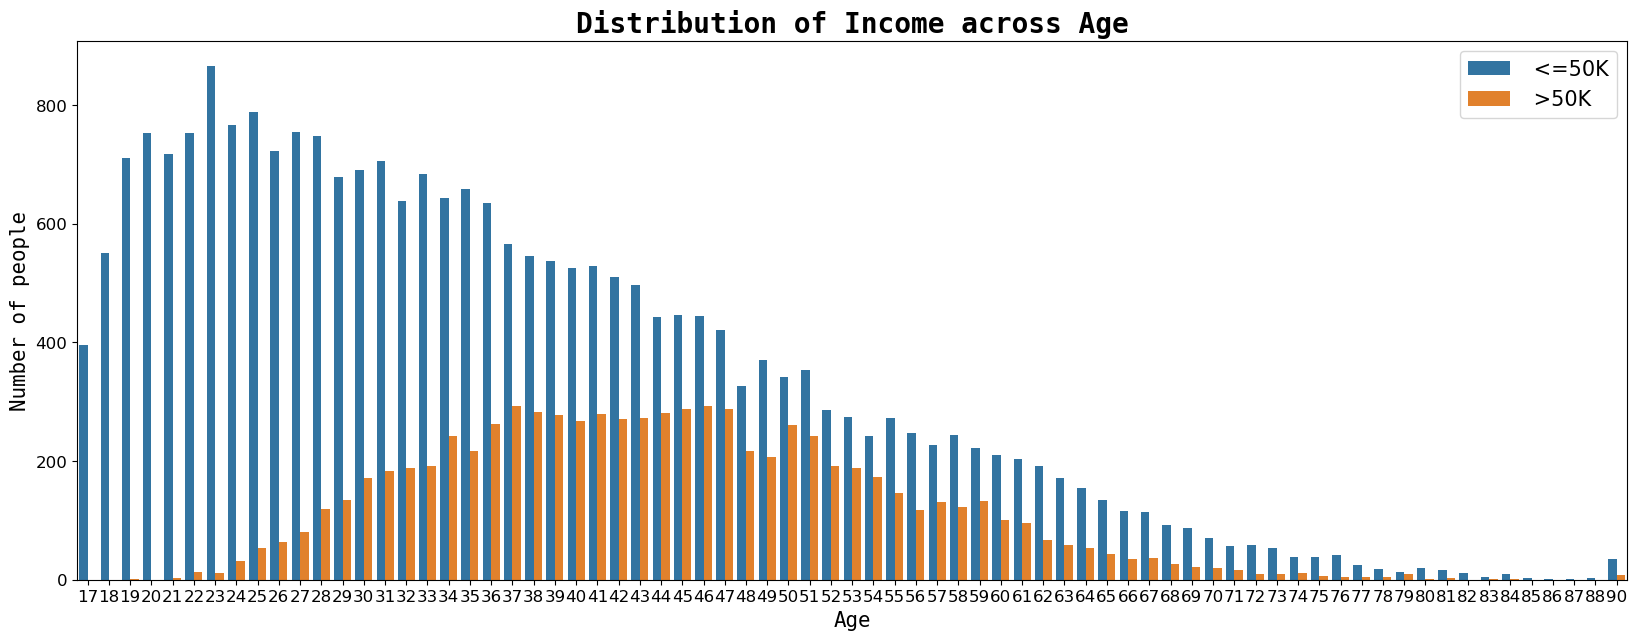

In [32]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['Age'], hue=data['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

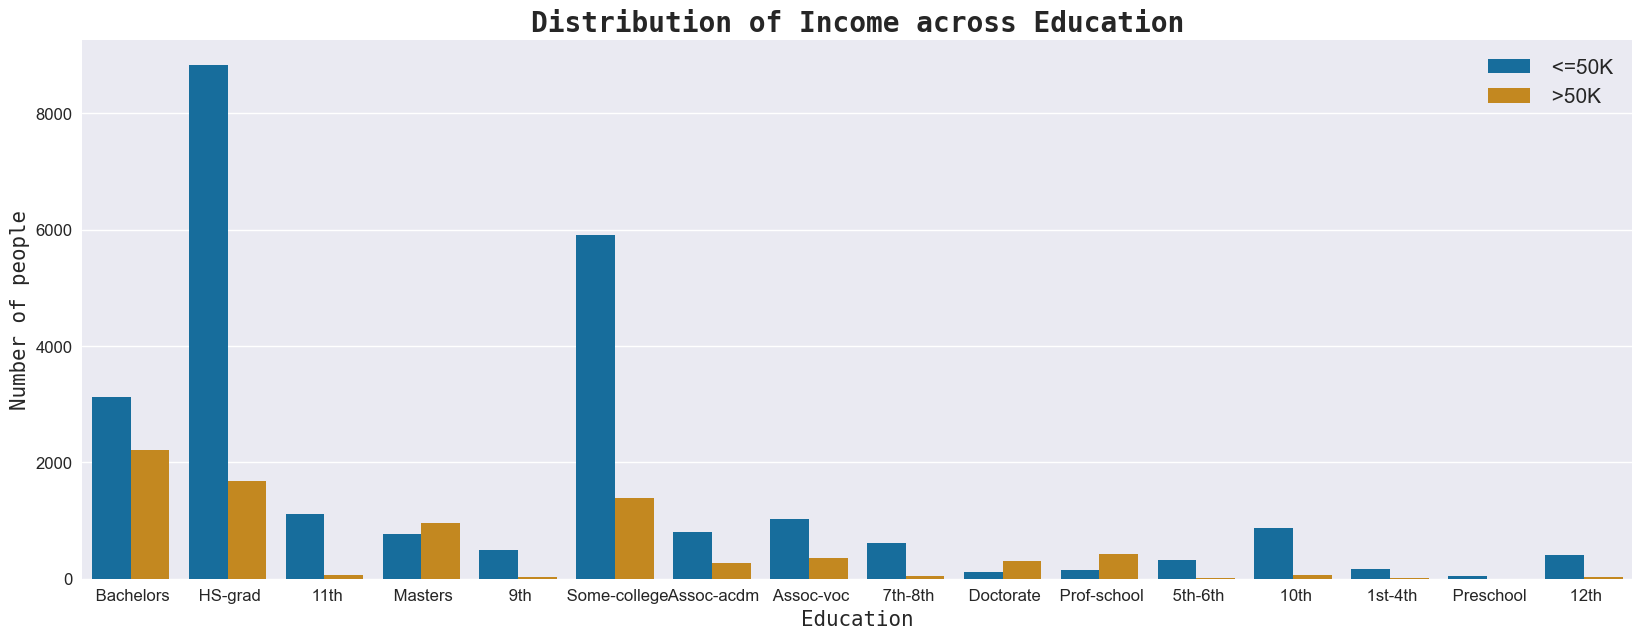

In [33]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['Education'],
              hue=data['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

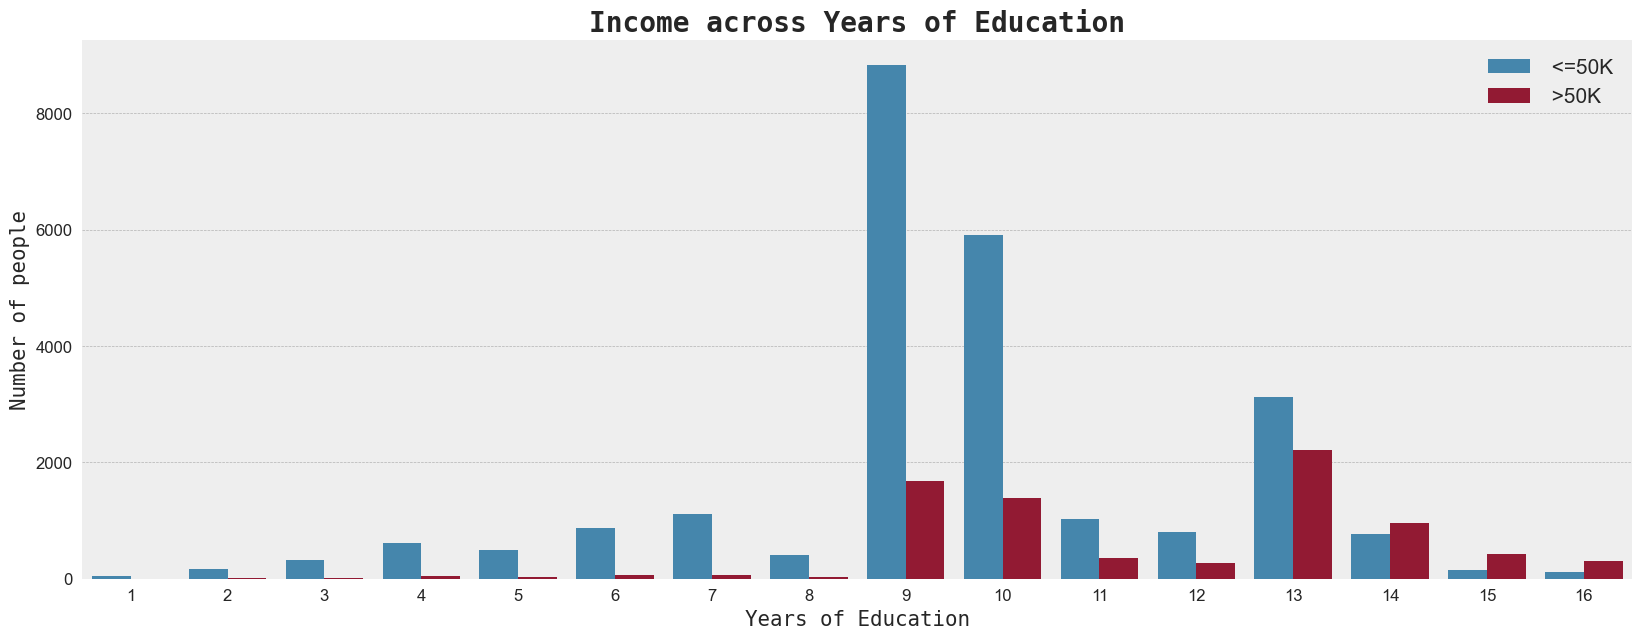

In [34]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data['Education_num'],
              hue=data['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

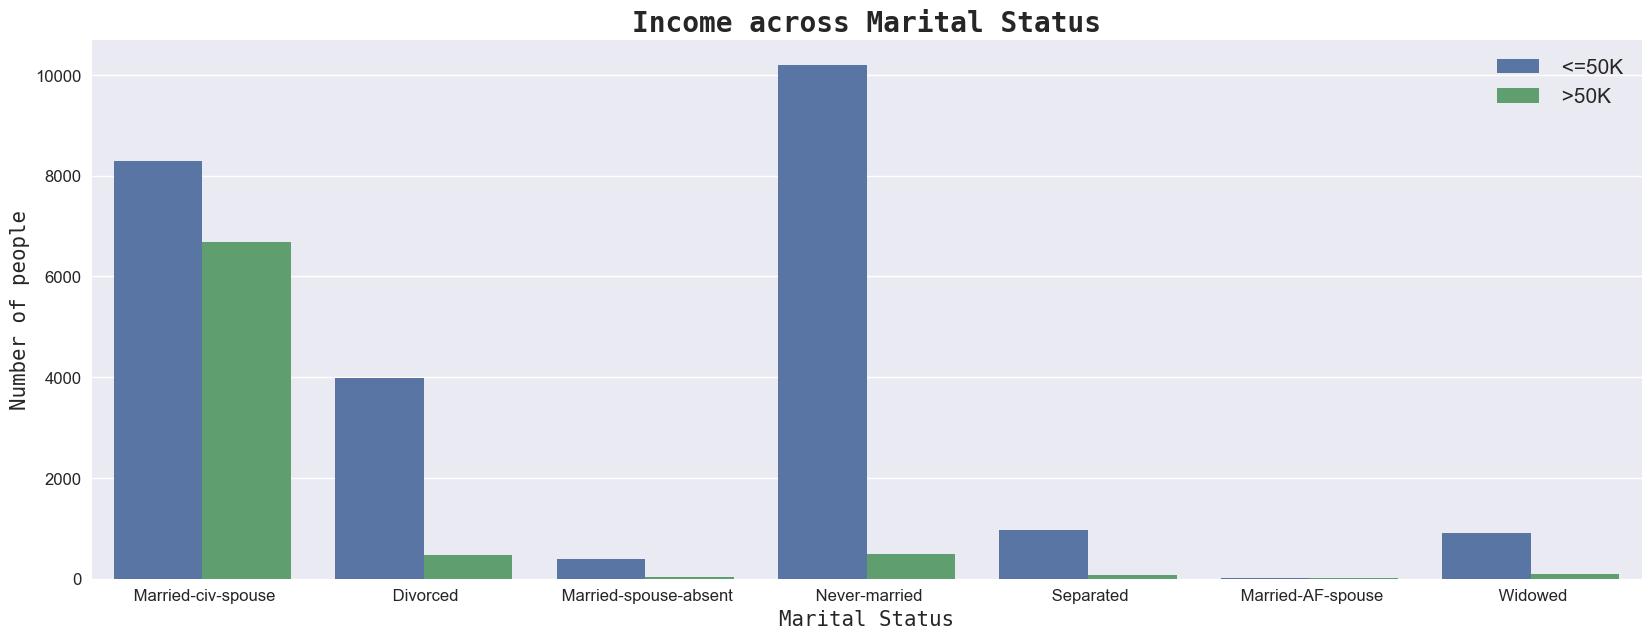

In [35]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['Marital_status'], hue=data['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

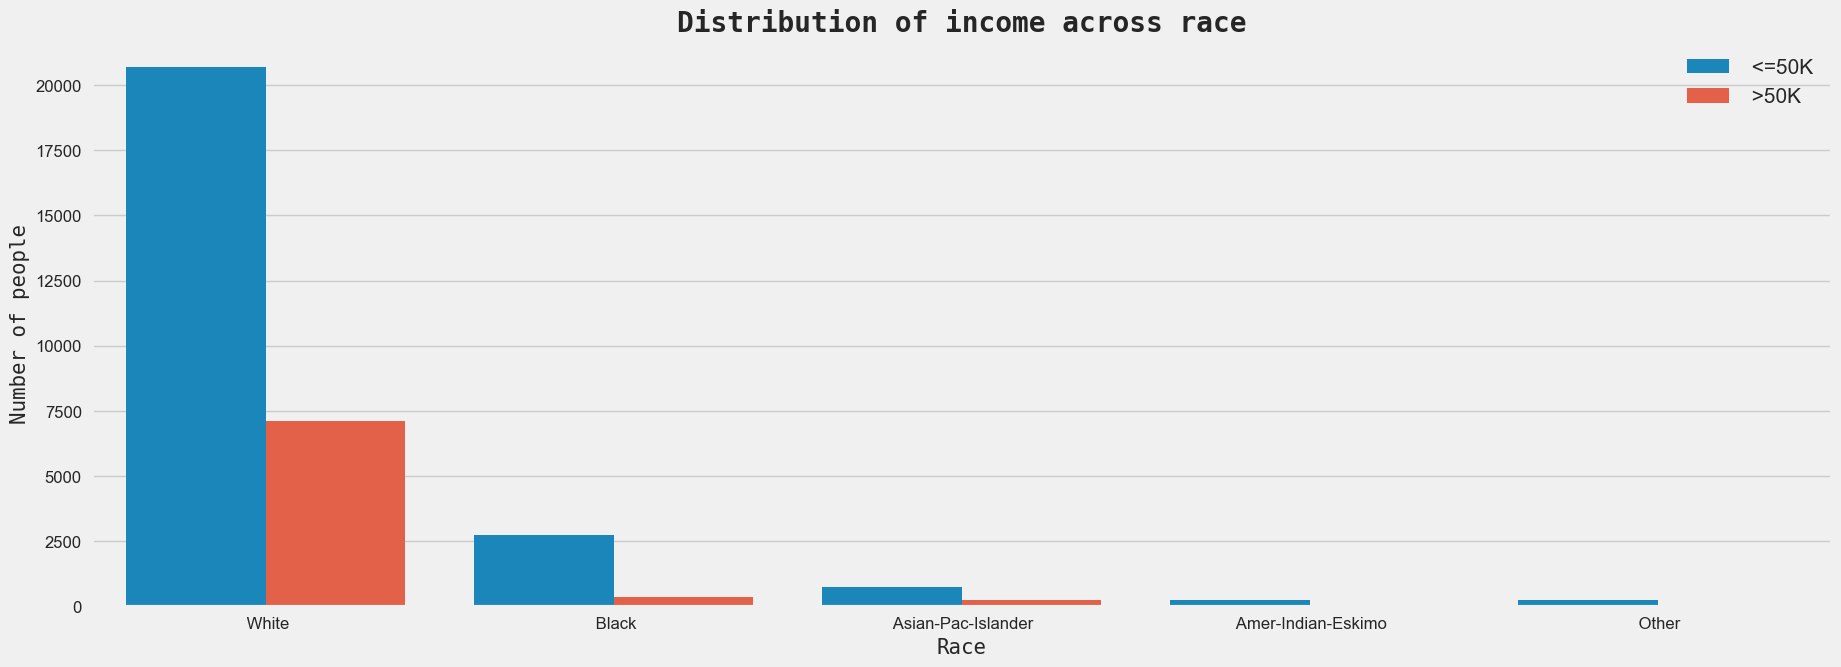

In [36]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data['Race'], hue=data['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

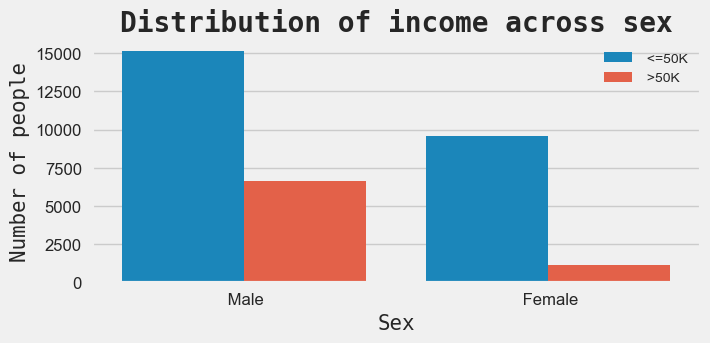

In [37]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(data['Sex'], hue=data['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()


# Multivariate Analysis(using pair plot )

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
data['Income'] = le.fit_transform(data['Income'])

In [40]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


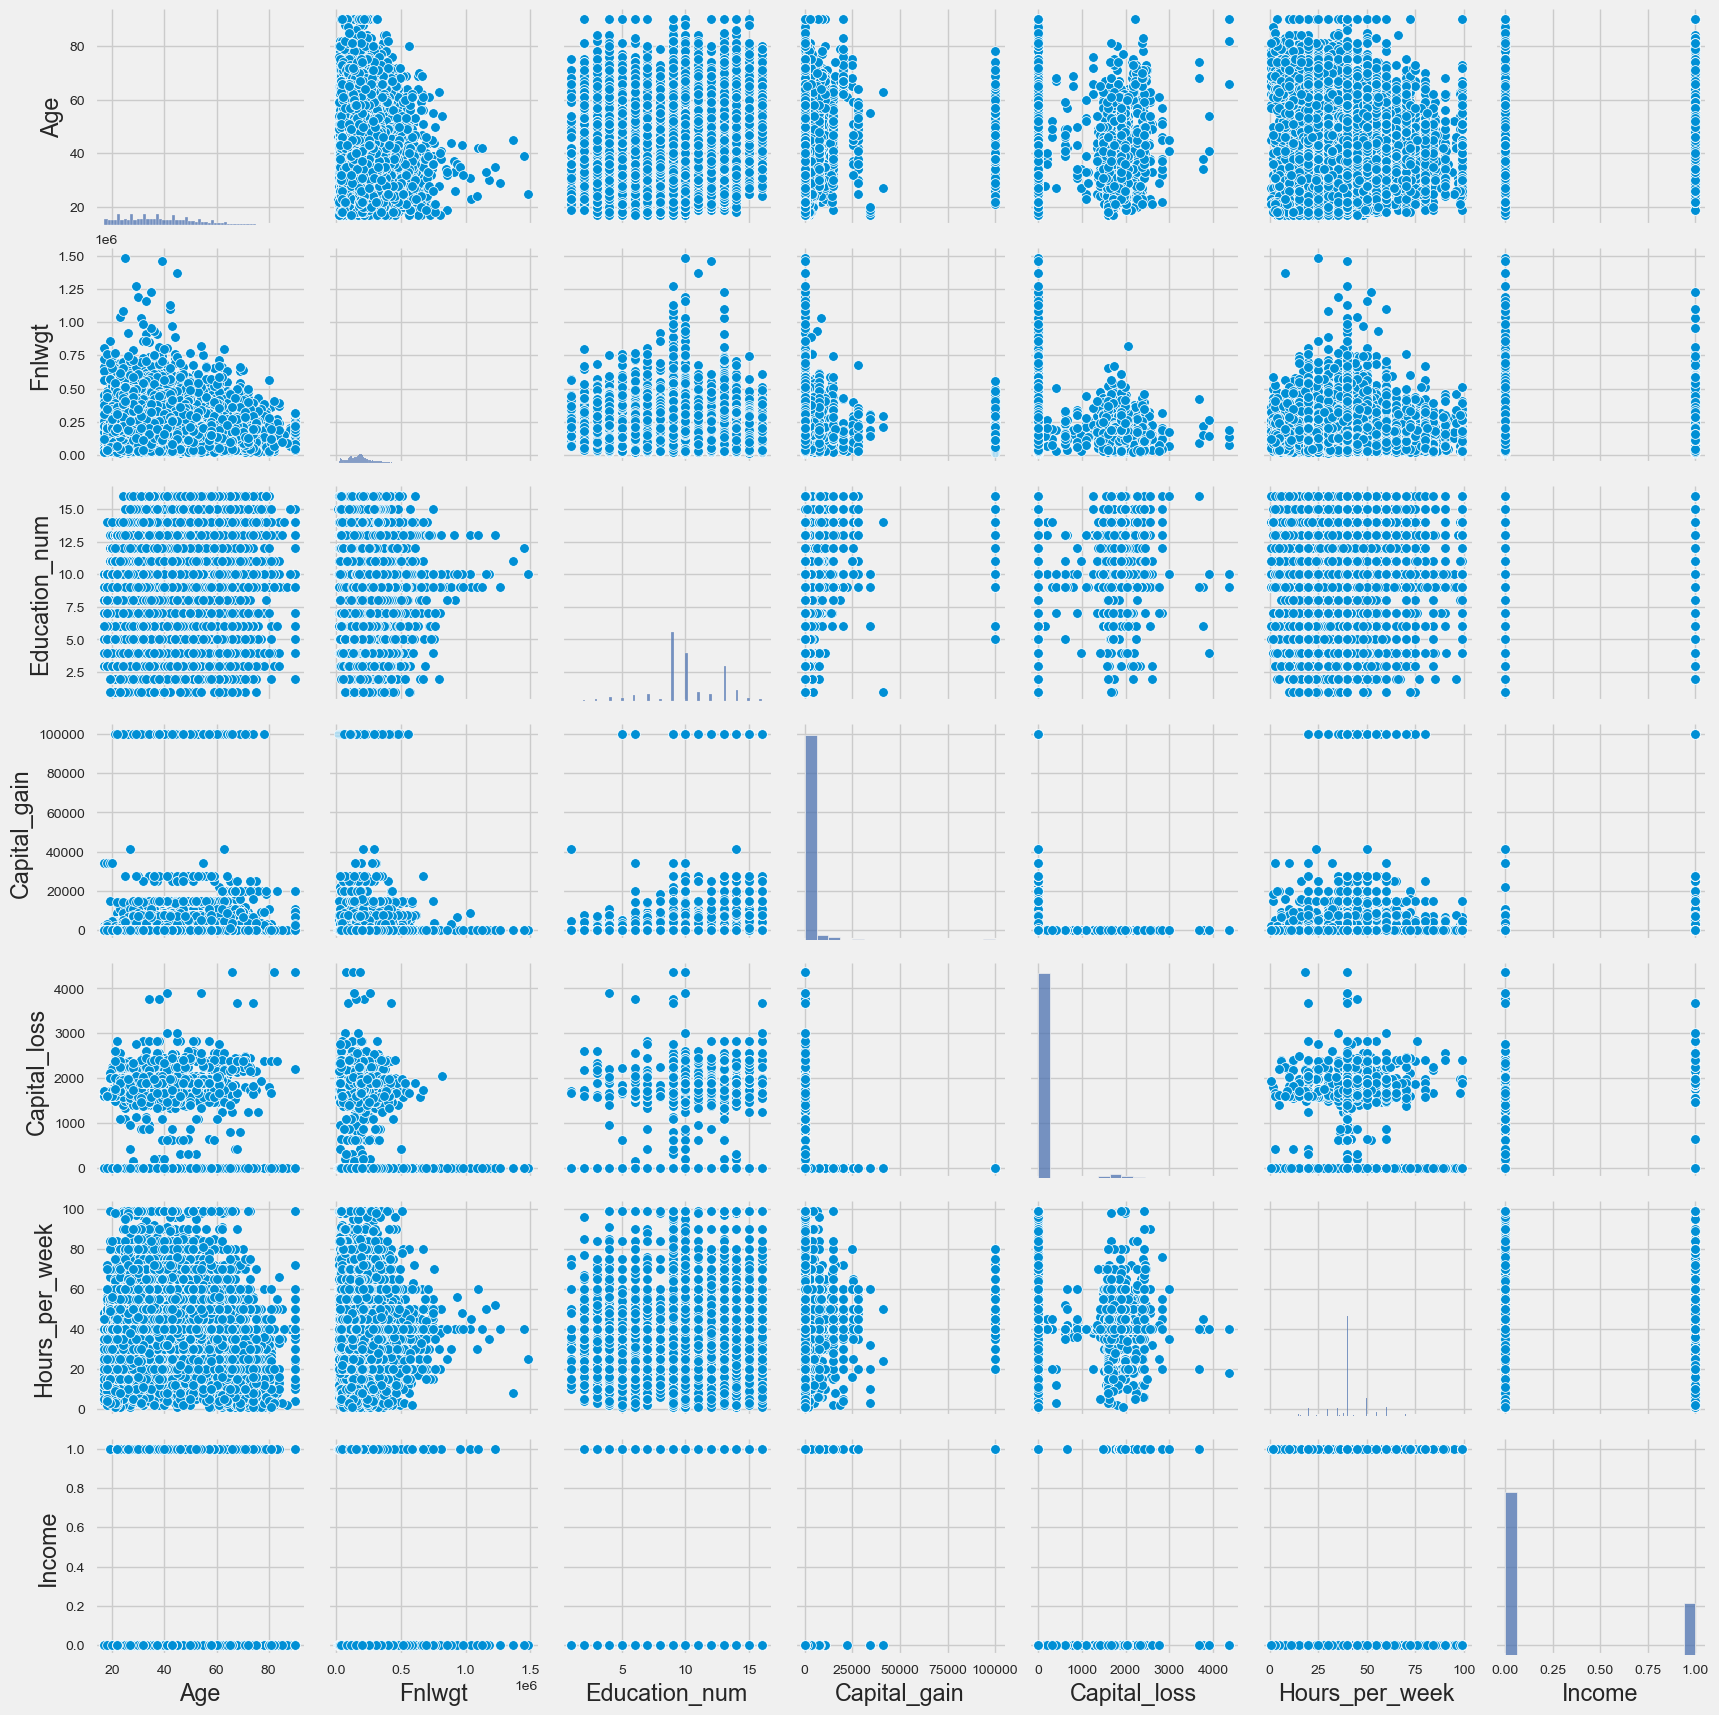

In [41]:
# Creating a pairplot of data
sns.pairplot(data)
plt.savefig('multi1.png')
plt.show()

# Encoding of data Frame:

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [43]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [44]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


# heatmap

In [45]:
data.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

here we can see that target column is very less correlated with "FNLWGT" and Native_country,Workclass,Occupation,Education,Race
and with other target column is correlated with fetures..

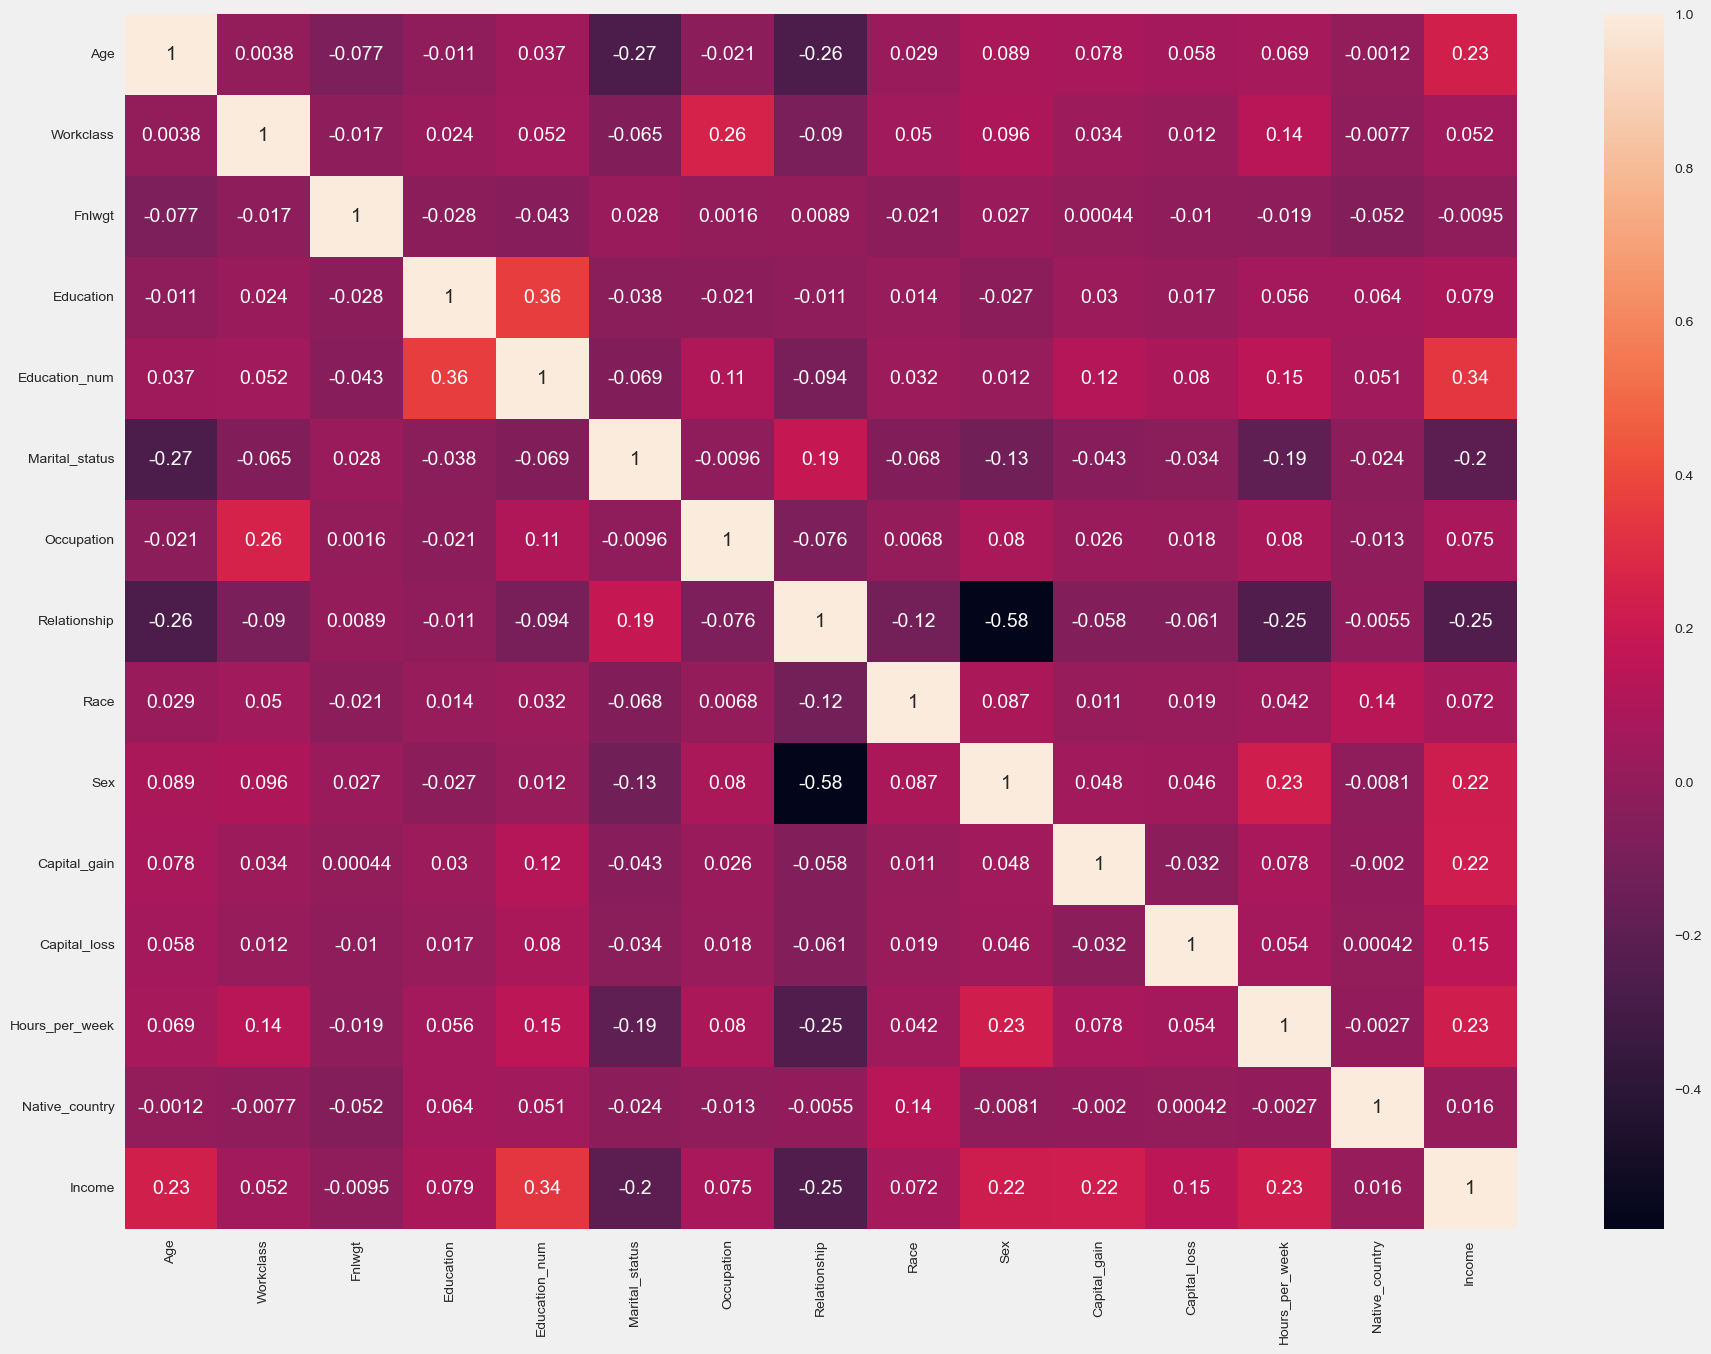

In [46]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)
plt.show()

here we can see that "Income" is highly correlated with  " Education_num"

checking the correlation is positive and negative..

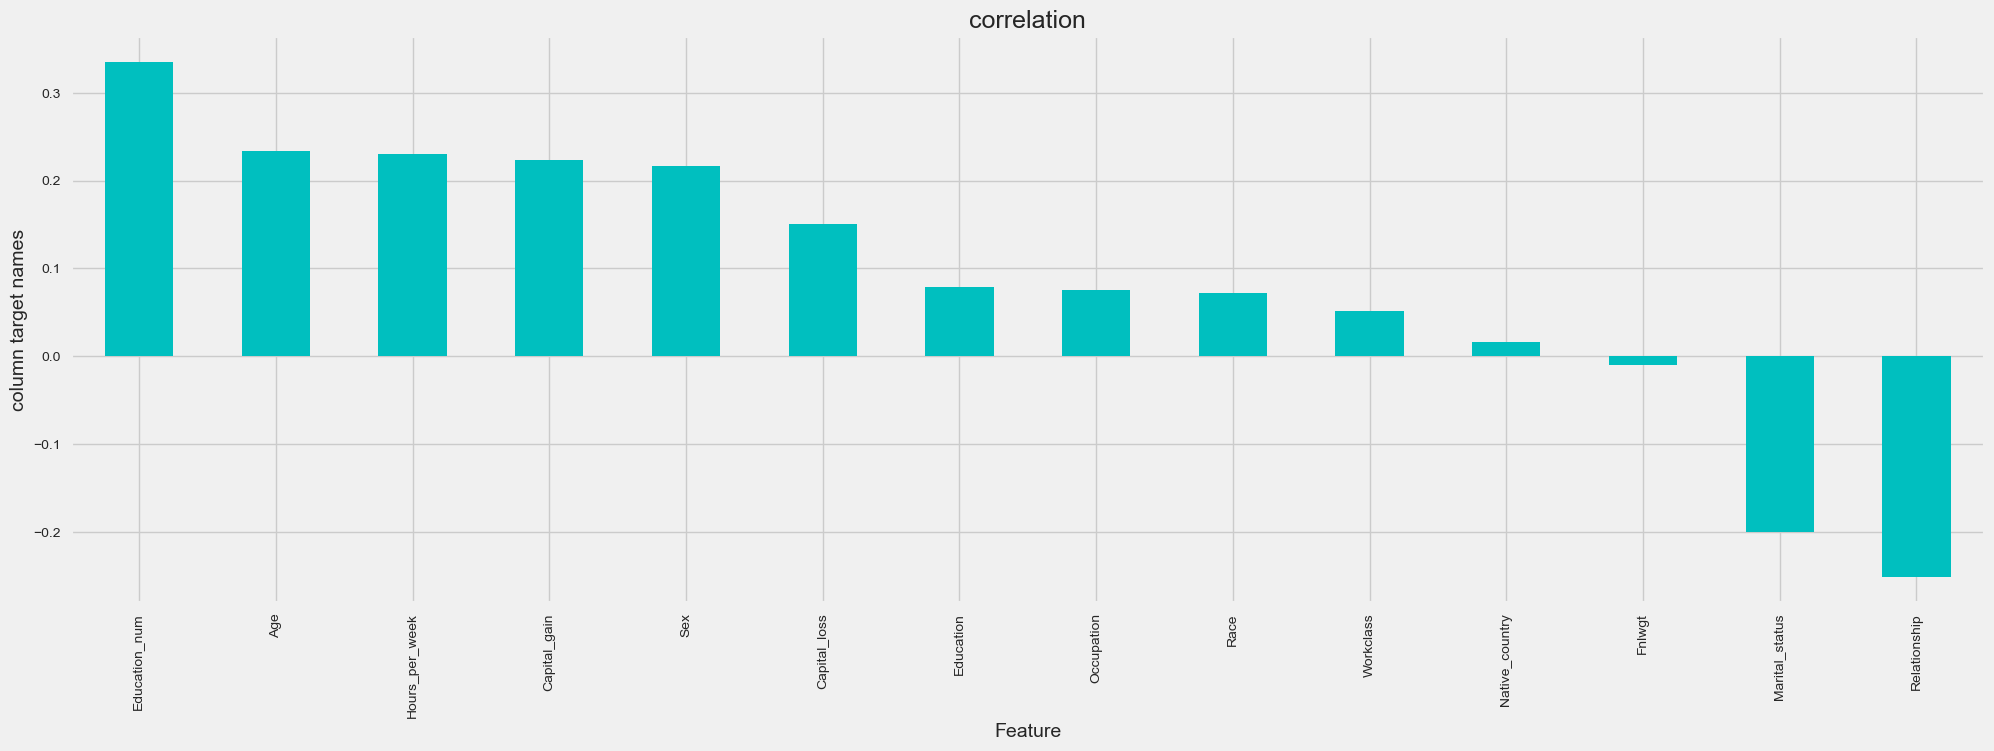

In [47]:
plt.figure(figsize=(22,7))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here only 2 data which is negative correlated with target i.e,  "marital status", "Relationship"

In [48]:
# Checking relationship between Dependent and Independent variables
x = data.drop(columns = ['Income'])
y = data['Income']

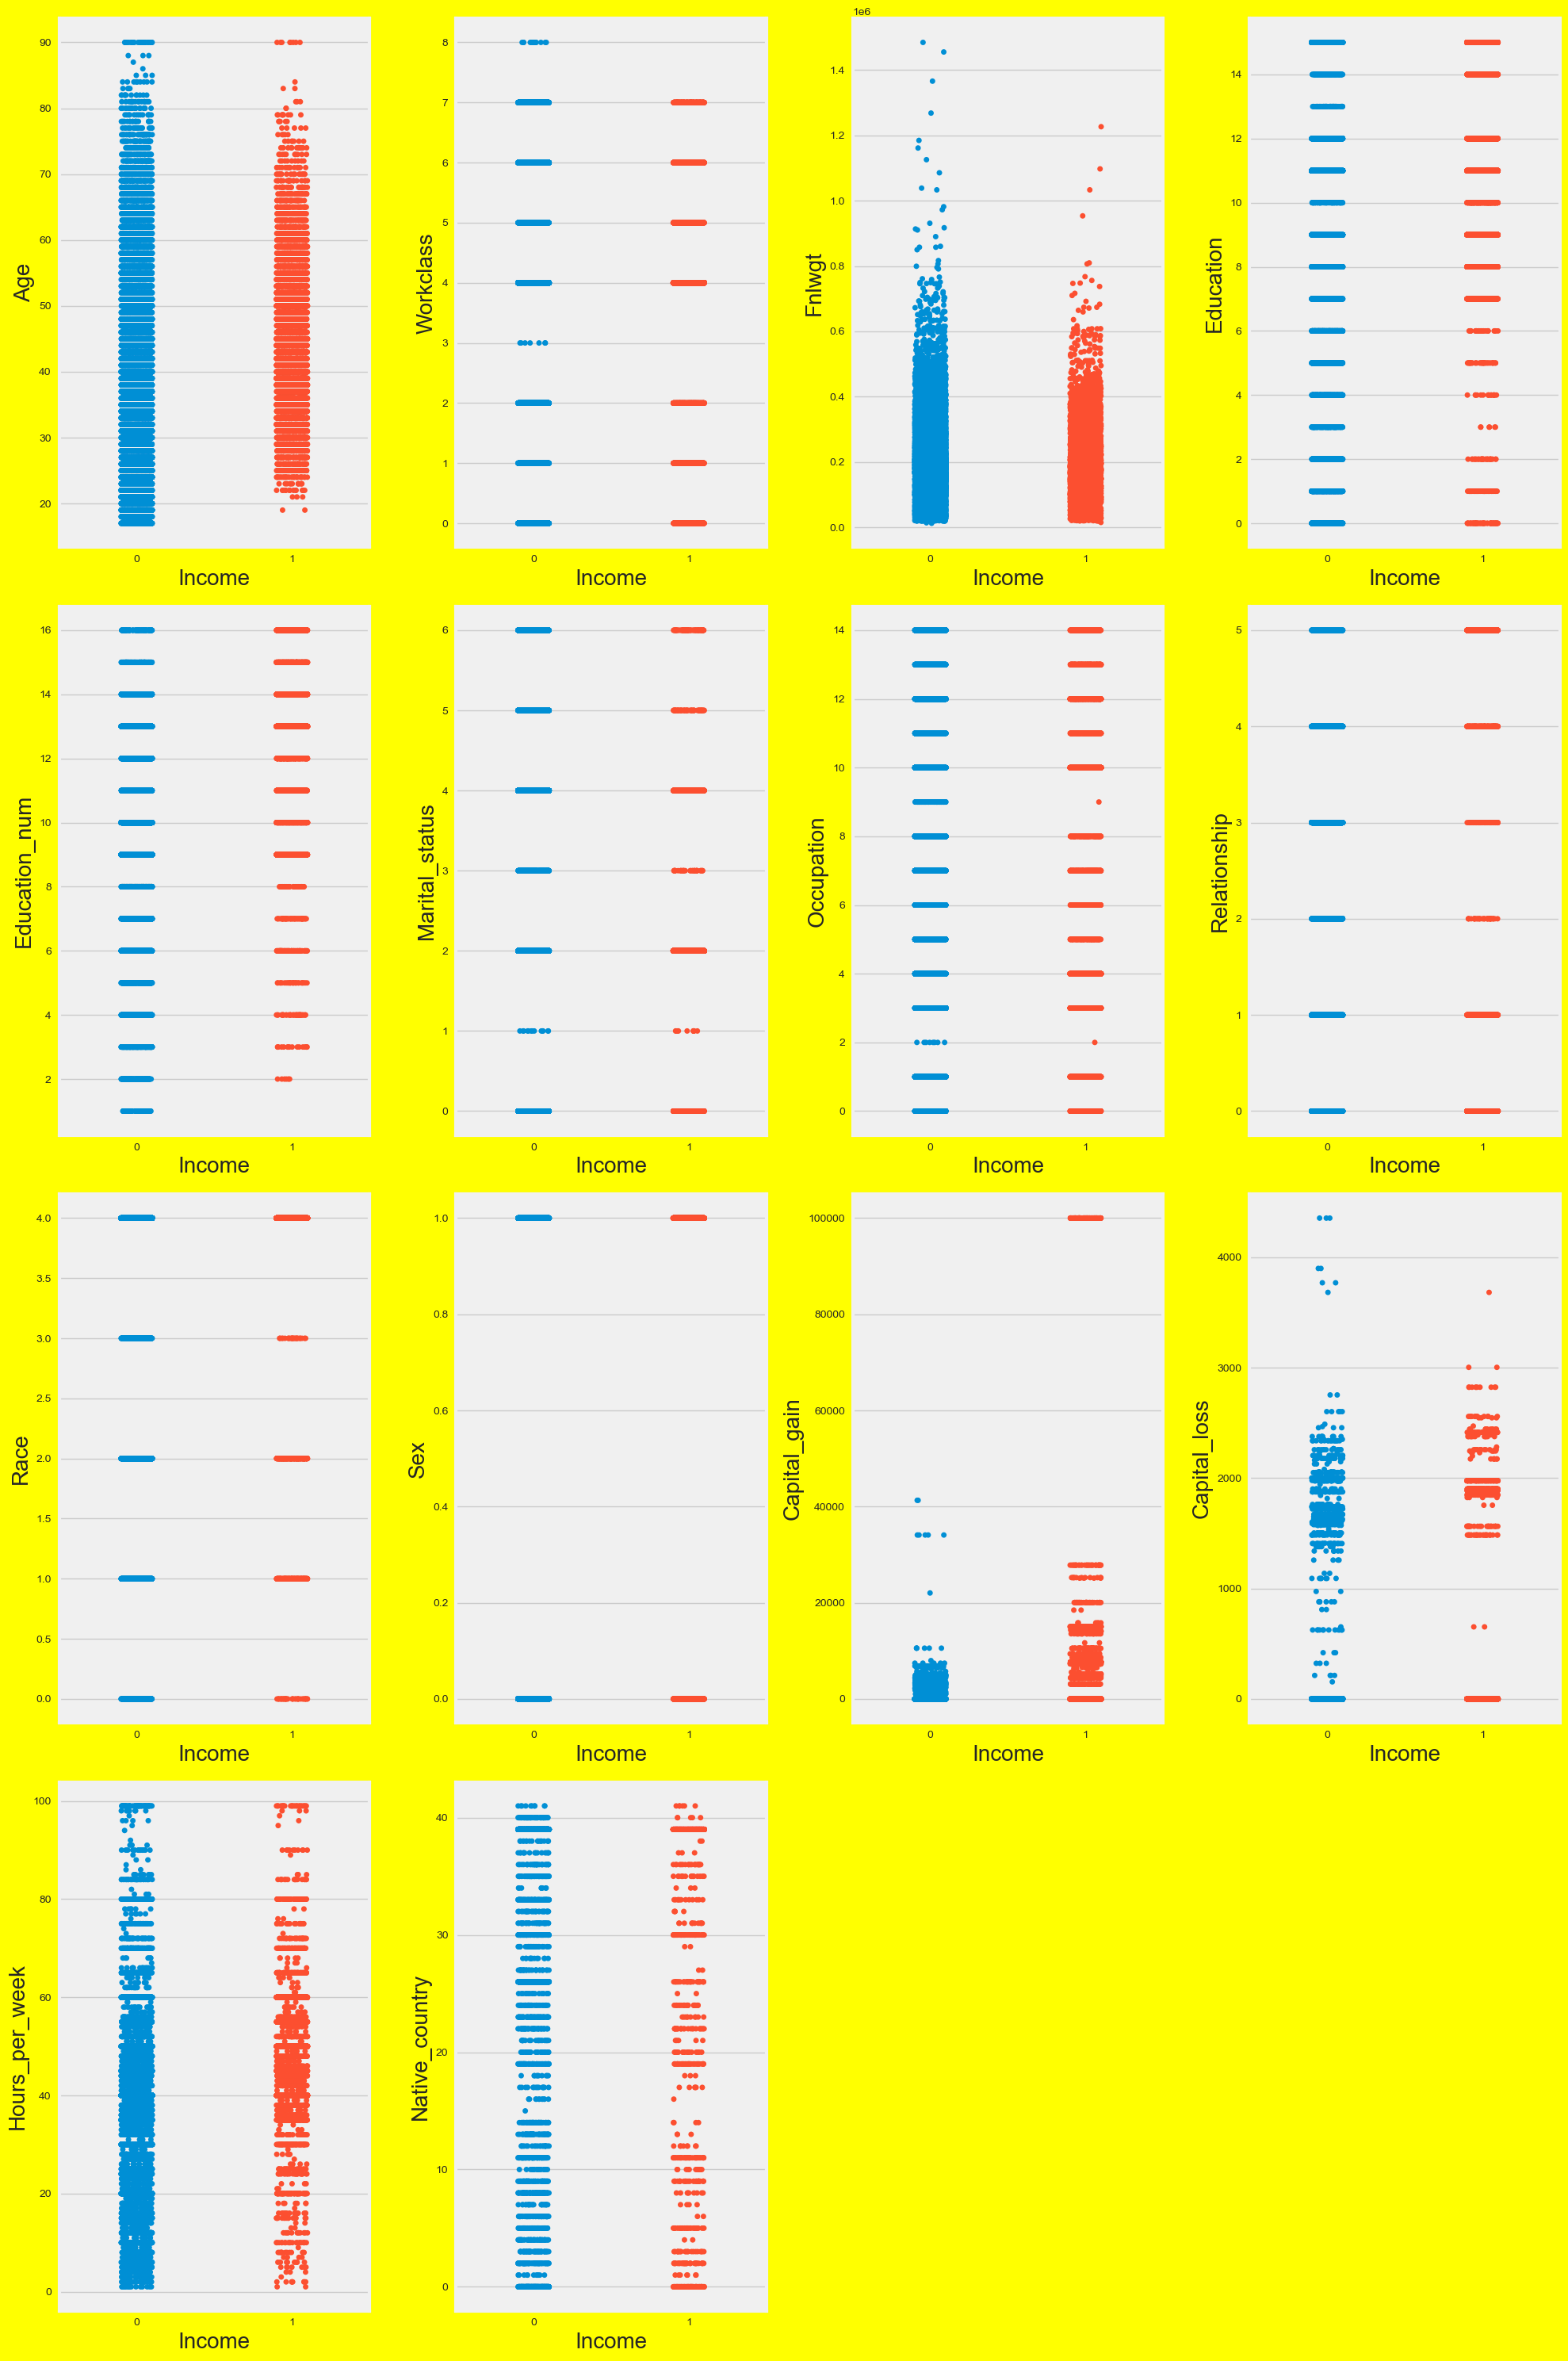

In [49]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,30), facecolor = 'yellow')
plotnum = 1

y = data['Income']
for col in x:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('Income',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

here we can see most of the data is very less correlated with target label..

# Check for Outliers and skewness

In [50]:
# checking skewness
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

keeping +/- 0.5 as the range for skewness, here are the columns which does not lie within the range..


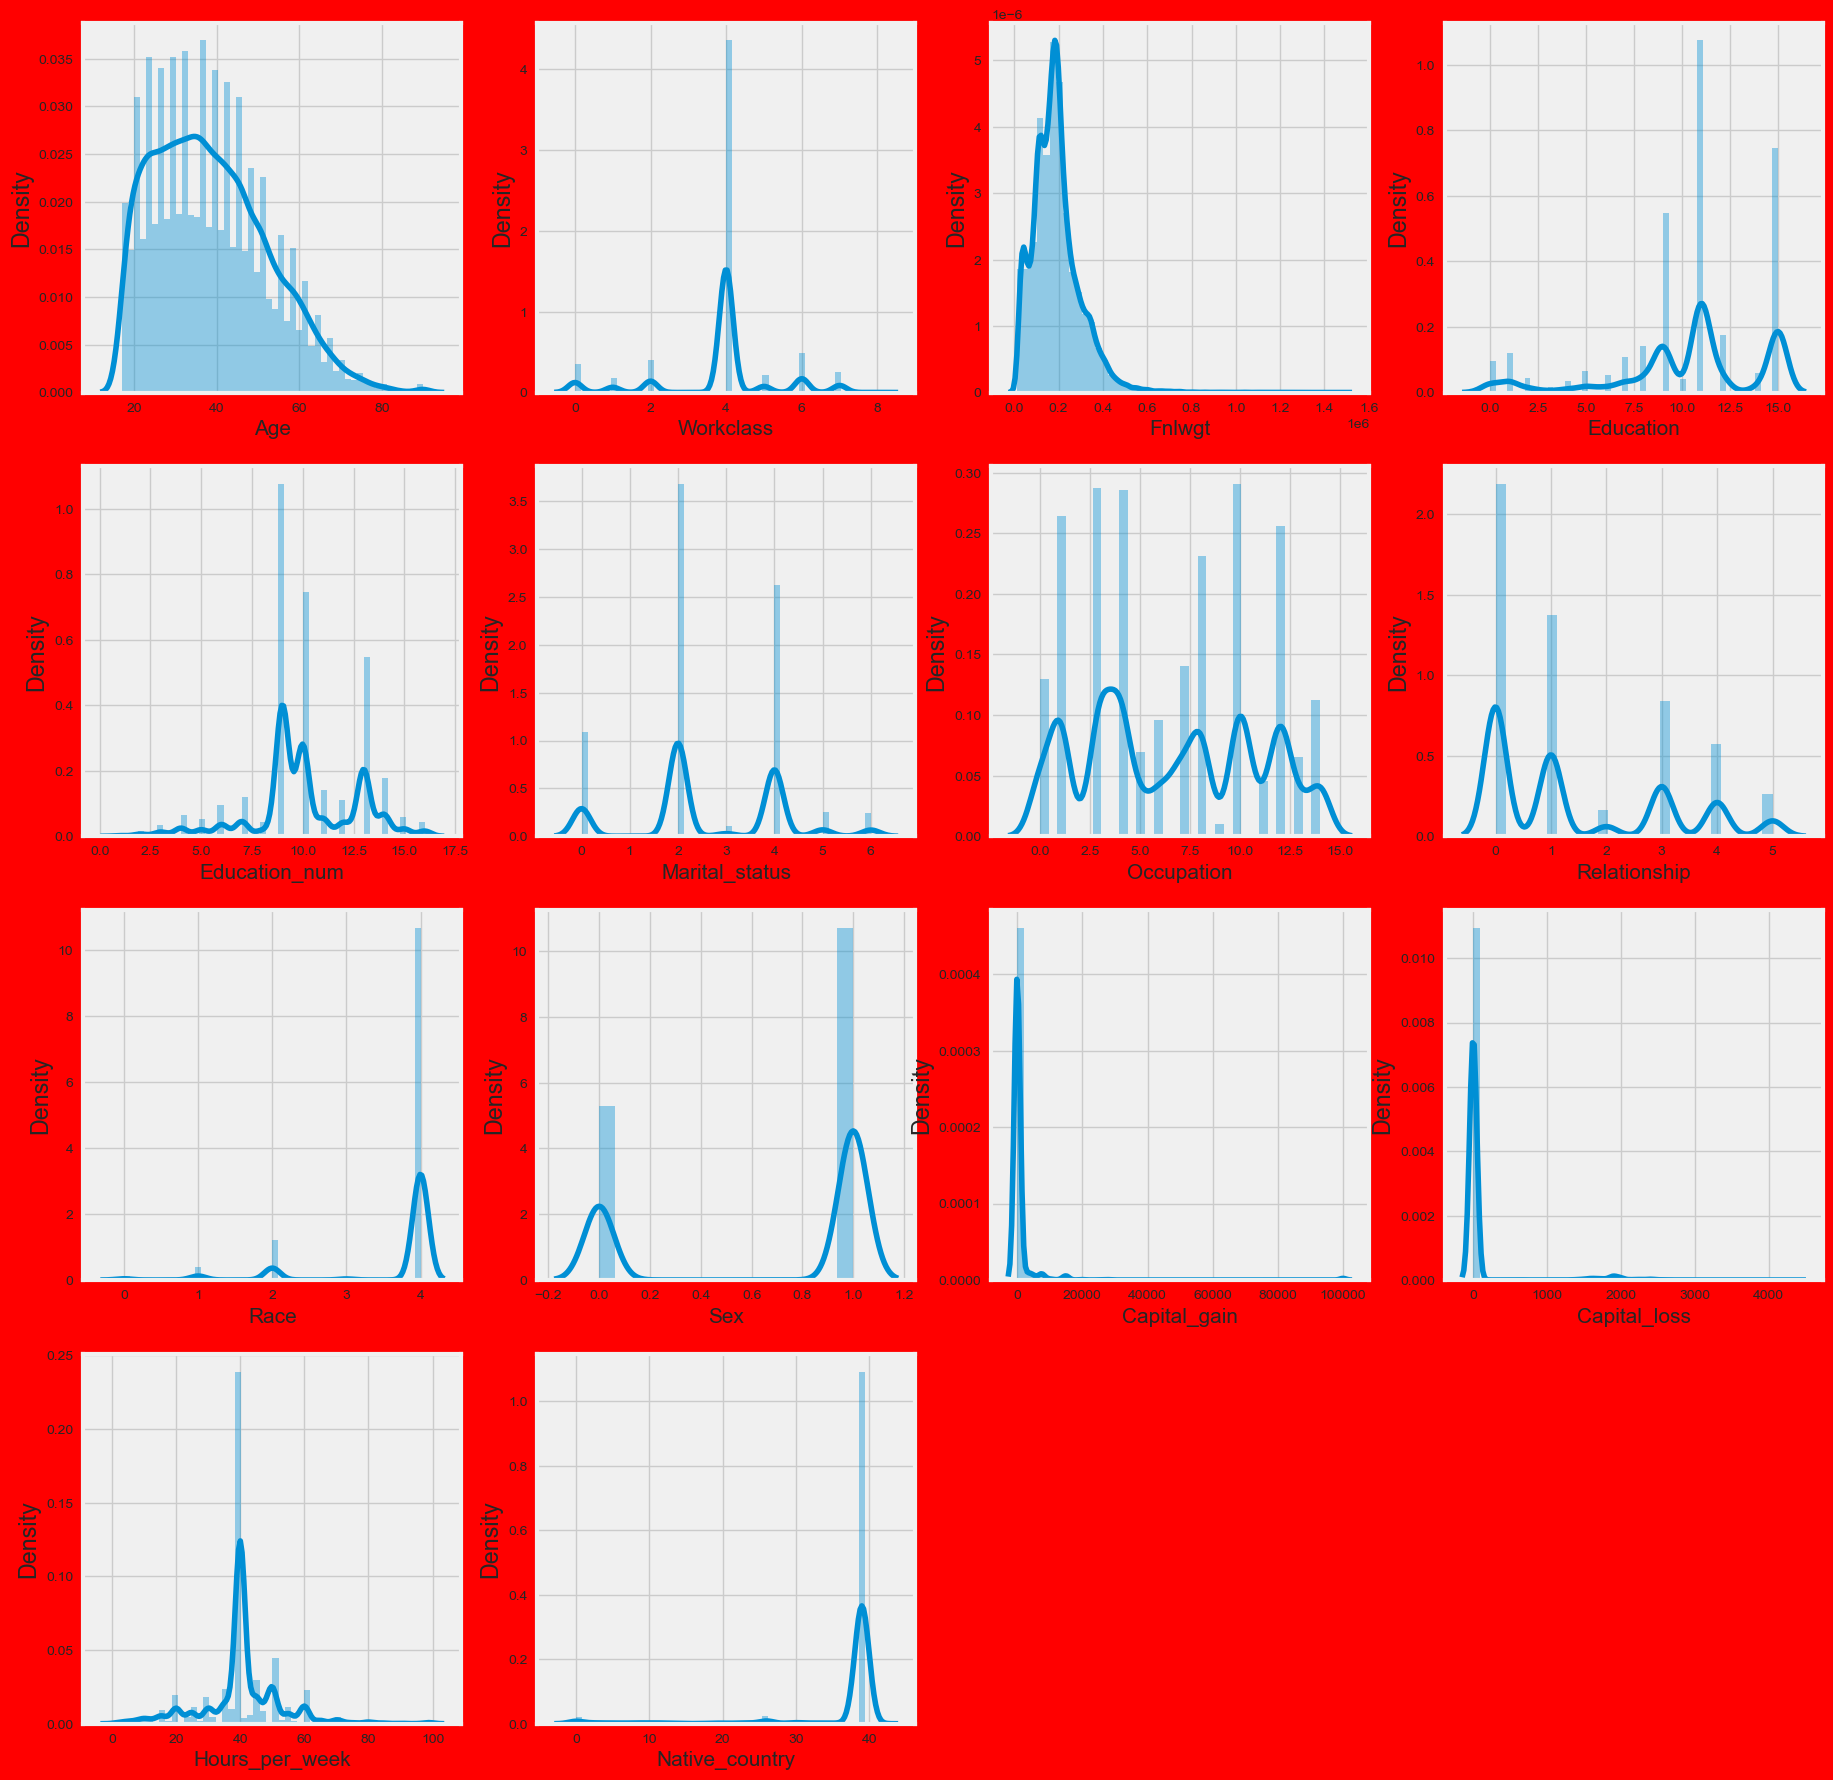

In [51]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='red')
plotnum = 1

for col in x:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

All data skewed to right side except "Age"

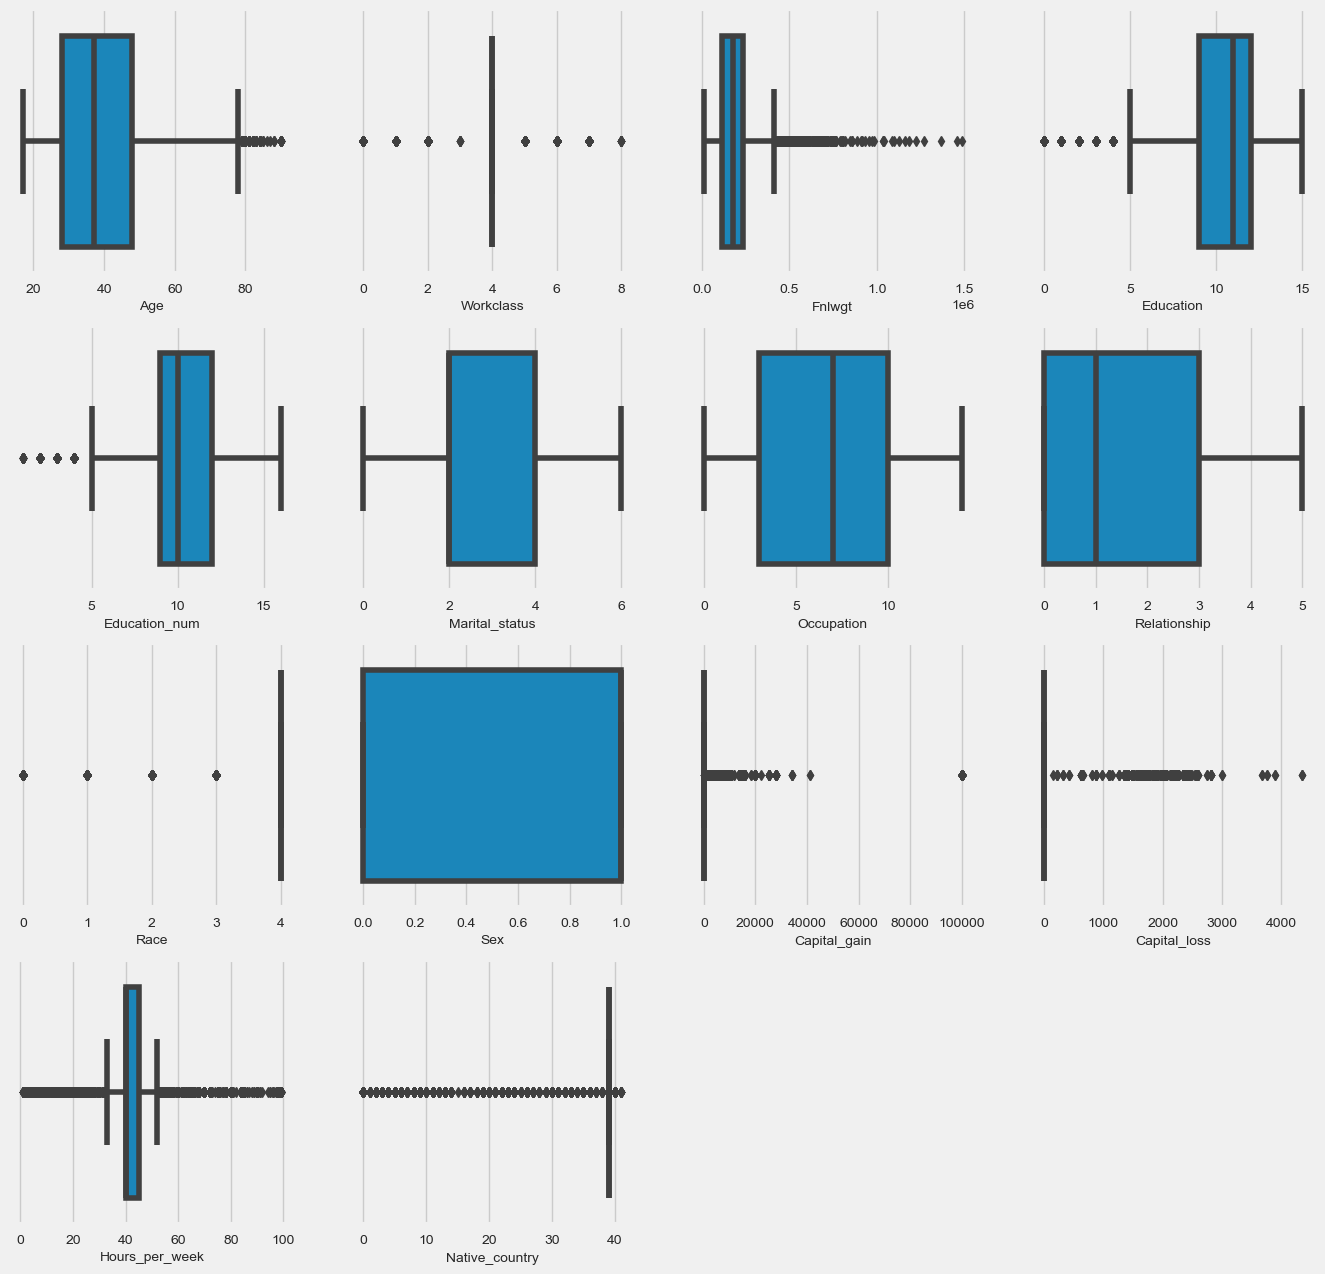

In [52]:
# Plot a boxplot to check for Outliers
# Target variable is Income. So will plot a boxplot each column against target variable
plt.figure(figsize=(15,15))
graph = 1

for column in x:
    if graph<=15:   # there are 15 column is the given data
        plt.subplot(4,4,graph)
        ax=sns.boxplot(x[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

we can see most of the column has, present outliers except Sex,marital status ,relationship,occupation...in this most of the column which have outliers are presesnt is categorical column...so no need to remove outliers..but hours per week,capital loss, capital gain,Fnlwgt,age are continous column...so we should remove outliers from this using Z- transform method..

# Z score method to remove outliers

In [53]:
I= data.copy()

from scipy.stats import zscore

zscor = zscore(I)
zabs = np.abs(zscor)
df = I[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(I.shape)

(27417, 15)
(32560, 15)


In [54]:
# Checking the dataloss in %

loss = (32560-27417)/32560*100
loss

15.795454545454547

see here we loss  15% data from row..

In [55]:
# Compare skewness
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

In [56]:
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [57]:
# Reducing the skewness further
data = df.copy()
feat = ['Capital_gain','Capital_loss']

skewdf = data[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

Capital_gain   NaN
Capital_loss   NaN
dtype: float64

In [58]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = data[feat].copy()
df1.skew()

Capital_gain     4.934878
Capital_loss    29.325736
dtype: float64

In [59]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

Capital_gain     3.069625
Capital_loss    24.623864
dtype: float64

In [60]:
skewdf.skew()

Capital_gain   NaN
Capital_loss   NaN
dtype: float64

Comparing outputs of Log Transformer and Power Transformer method, it is determined that log Transformer gives better result.

In [61]:
transformed.index = data.index
data[feat] = transformed[feat]
x = data.drop(columns = ['Income'])
y = data['Income']
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

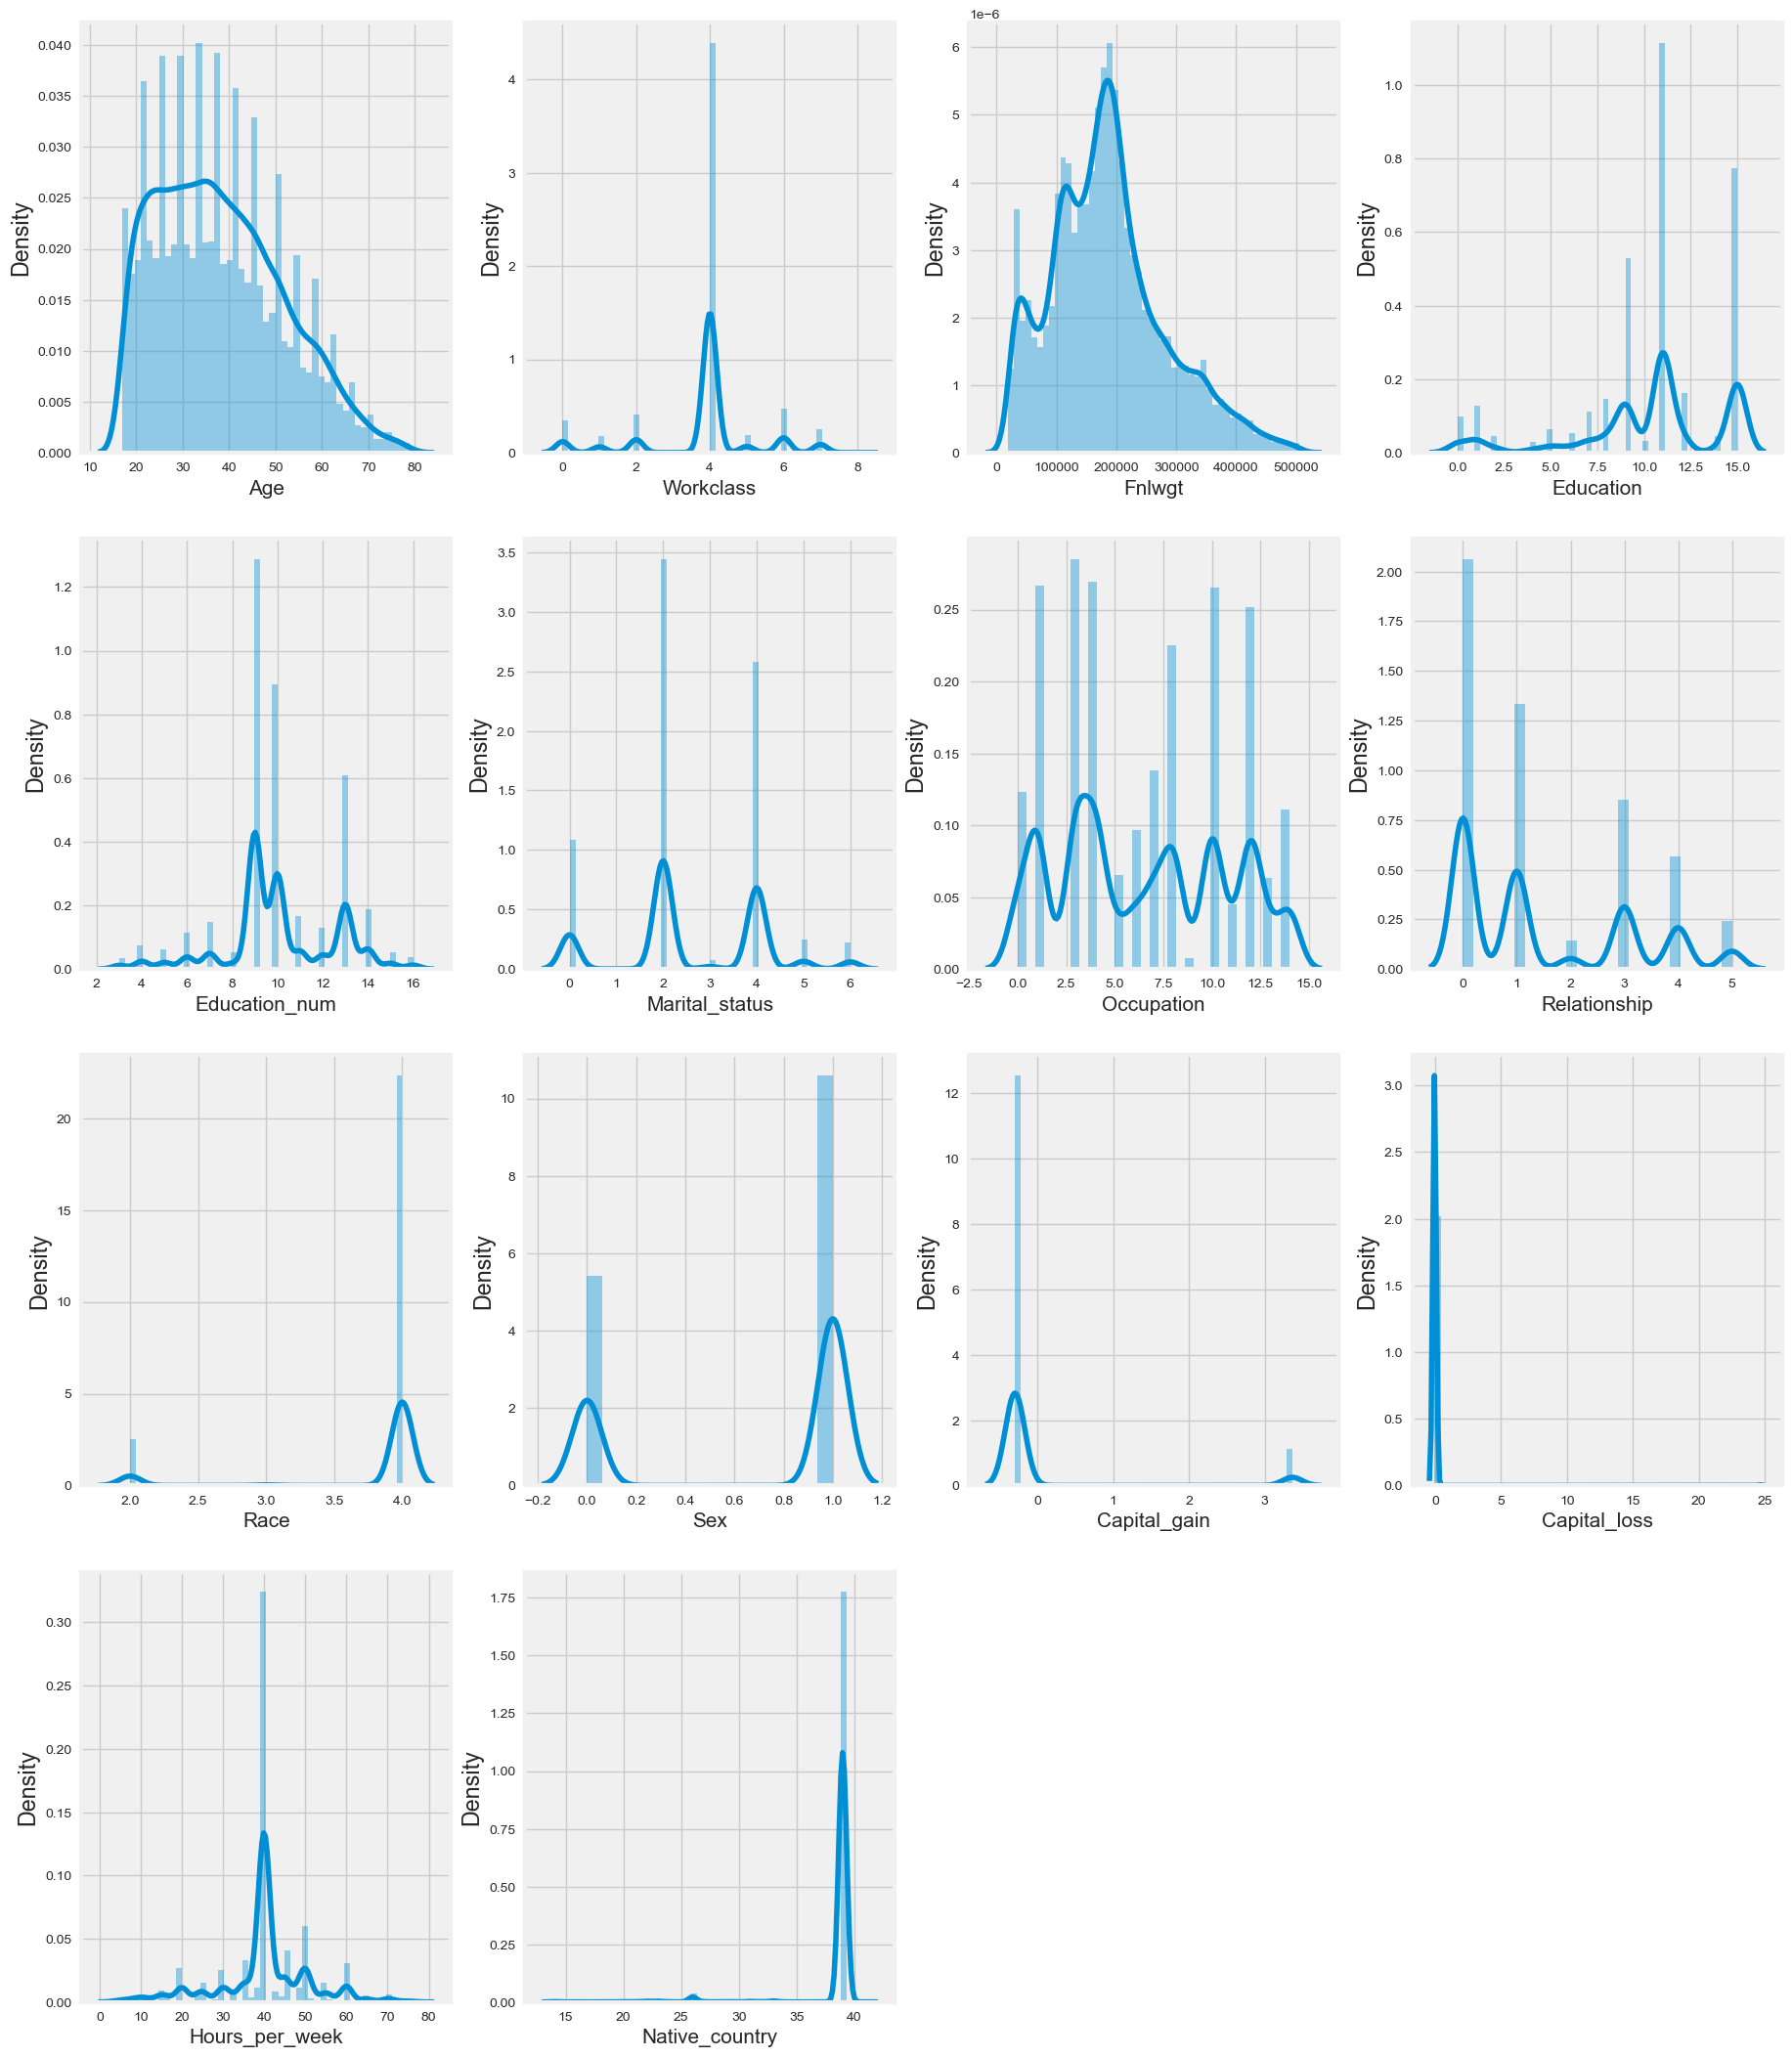

In [62]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

most of the outliers are remove and which is present these are catgorical column..

# Feature Selection

In [64]:
x = data.drop('Income', axis=1)
y = data['Income']

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [66]:
selector.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [67]:
feature_imp = selector.feature_importances_

In [68]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 16.99
1 4.94
2 18.57
3 3.64
4 8.82
5 7.96
6 8.33
7 7.9
8 0.86
9 2.81
10 8.39
11 0.04
12 9.91
13 0.84


In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27417 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27417 non-null  int64  
 1   Workclass       27417 non-null  float64
 2   Fnlwgt          27417 non-null  int64  
 3   Education       27417 non-null  float64
 4   Education_num   27417 non-null  int64  
 5   Marital_status  27417 non-null  float64
 6   Occupation      27417 non-null  float64
 7   Relationship    27417 non-null  float64
 8   Race            27417 non-null  float64
 9   Sex             27417 non-null  float64
 10  Capital_gain    27417 non-null  float64
 11  Capital_loss    27417 non-null  float64
 12  Hours_per_week  27417 non-null  int64  
 13  Native_country  27417 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 3.1 MB


In [70]:
x = x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

# Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

# Fixing imbalanced dataset using Oversampling

In [73]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    77.61 %
1    22.39 %
Name: Income, dtype: object

In [74]:

from imblearn.over_sampling import RandomOverSampler 

In [75]:
ros = RandomOverSampler(random_state=42)

In [77]:
ros.fit(x, y)

RandomOverSampler(random_state=42)

In [78]:
x_resampled, y_resampled = ros.fit_resample(x, y)

In [80]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

# Creating a train test split

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42)

In [83]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (34046, 8)
x_test shape: (8512, 8)
y_train shape: (34046,)
y_test shape: (8512,)


# Data Modelling

# 1.. Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [127]:
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [86]:
y_pred_log_reg = log_reg.predict(x_test)

# 2: KNN Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred_knn = knn.predict(x_test)

# 3: Support Vector Classifier

In [92]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [93]:
y_pred_svc = svc.predict(x_test)

# 4: Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [95]:
y_pred_nb = nb.predict(x_test)

# 5: Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred_dec_tree = dec_tree.predict(x_test)

# .6: Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred_ran_for = ran_for.predict(x_test)

#  Model Evaluation

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [104]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.57
F1 score: 76.5


In [105]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.16
F1 score: 84.15


In [106]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.3
F1 score: 82.35


In [107]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 78.83
F1 score: 78.42


In [108]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.48
F1 score: 91.86


In [109]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.73
F1 score: 93.0


we can see that all model are well trained..but Random Forest Classifier gives higest Accuracy= 92.73
and F1 score is also good=93..so we select this model for hyperparameter tuning,,,...

# Hyperparameter Tuning

In [110]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [111]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [112]:
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [113]:
rf_cv.best_score_

0.9165835017098601

In [114]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [115]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [117]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [118]:
y_pred_rf_best = rf_best.predict(x_test)

In [119]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.74
F1 score: 93.0


In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

In [121]:
cm

array([[3788,  521],
       [  97, 4106]], dtype=int64)

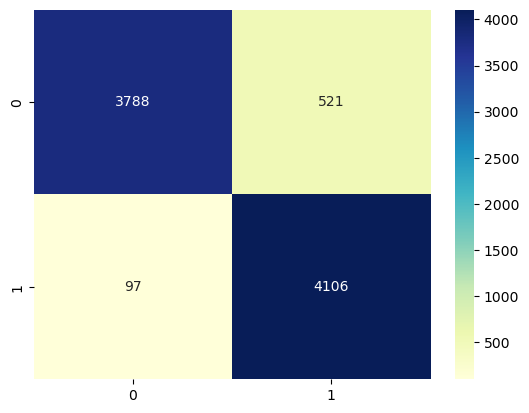

In [122]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      4309
           1       0.89      0.98      0.93      4203

    accuracy                           0.93      8512
   macro avg       0.93      0.93      0.93      8512
weighted avg       0.93      0.93      0.93      8512



# Random Forest Classifier is the best model for the dataset...


# ROC AUC Curves

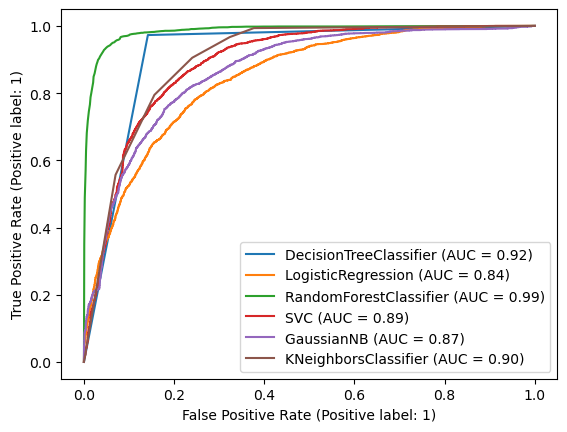

In [129]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dec_tree,x_test,y_test)
mod = [log_reg,ran_for,svc,nb,knn]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.99

# above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.99

# (Best model save)

In [131]:
import joblib
joblib.dump(rf_best,"Best_data.pkl")

['Best_data.pkl']

In [132]:
mod = joblib.load("Best_data.pkl")
print(mod.predict(x_test))

[1 1 0 ... 1 1 0]


In [133]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
8507,1,1
8508,0,0
8509,0,1
8510,1,1


# this is very good model...